In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.count()
ride_data_df.count()

city_data_df.isnull().sum()
ride_data_df.isnull().sum()

city_data_df.dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [22]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [51]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]

urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]

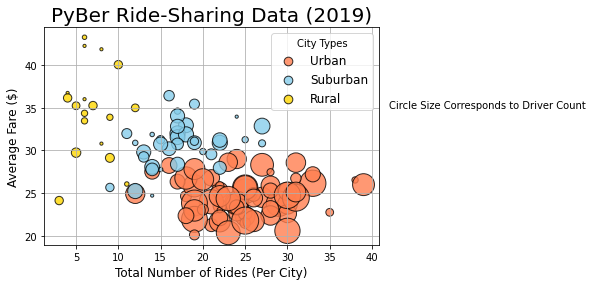

In [57]:
plt.scatter(urban_ride_count,
            urban_avg_fare,
            c="coral",
            edgecolors="k",
            linewidth=1,
            alpha=0.8,
            s=10*urban_driver_count,
            label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            c="skyblue",
            edgecolors="k",
            linewidth=1,
            alpha=0.8,
            s=10*suburban_driver_count,
            label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            c="gold",
            edgecolors="k",
            linewidth=1,
            alpha=0.8,
            s=10*rural_driver_count,
            label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)

plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)

plt.grid(True)

lgnd = plt.legend(fontsize=12, mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.text(42, 35, "Circle Size Corresponds to Driver Count")

plt.show()